In [30]:
import time
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_json(Path() / "sarcasm.json", lines=True)
df.head()
print(df.shape)

(26709, 3)


In [32]:
df.drop(df.index[1000:],inplace=True)
df.drop(["article_link"],axis=1,inplace=True)
df.head()
print(df.shape)

(1000, 2)


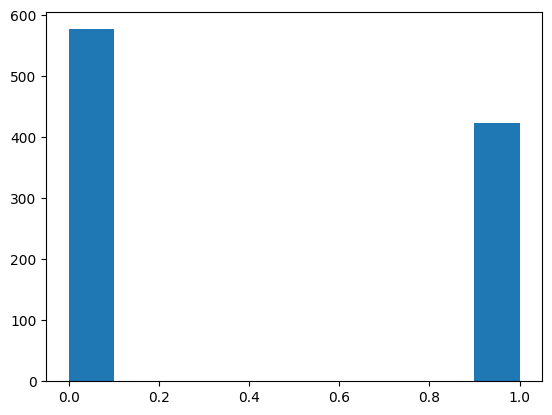

In [33]:
plt.hist(df["is_sarcastic"])
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv = CountVectorizer()
#x = np.array(data["headline"])
X = cv.fit_transform(df["headline"])
df_headline = pd.DataFrame(X.todense(),columns=cv.get_feature_names_out())
df = pd.concat([df.drop(["headline"],axis=1),df_headline],axis=1)
print(df.head())
print(df.shape)

   is_sarcastic  000  000th  10  100  10th  11  113  118  12  ...  young  \
0             0    0      0   0    0     0   0    0    0   0  ...      0   
1             0    0      0   0    0     0   0    0    0   0  ...      0   
2             1    0      0   0    0     0   0    0    0   0  ...      0   
3             1    0      0   0    0     0   0    0    0   0  ...      0   
4             0    0      0   0    0     0   0    0    0   0  ...      0   

   younger  your  youth  youths  youtube  zany  zen  zone  zuckerberg  
0        0     0      0       0        0     0    0     0           0  
1        0     0      0       0        0     0    0     0           0  
2        0     0      0       0        0     0    0     0           0  
3        0     0      0       0        0     0    0     0           0  
4        0     0      0       0        0     0    0     0           0  

[5 rows x 4172 columns]
(1000, 4172)


In [36]:
pd.isna(df)

,is_sarcastic,000,000th,10,100,10th,11,113,118,12,...,young,younger,your,youth,youths,youtube,zany,zen,zone,zuckerberg
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df[df.isna().any(axis=1)]

,is_sarcastic,000,000th,10,100,10th,11,113,118,12,...,young,younger,your,youth,youths,youtube,zany,zen,zone,zuckerberg


In [38]:
df[df.isnull().any(axis=1)]

,is_sarcastic,000,000th,10,100,10th,11,113,118,12,...,young,younger,your,youth,youths,youtube,zany,zen,zone,zuckerberg


In [39]:
dfdelete = np.array(df[df.isna().any(axis=1)].index,df[df.isnull().any(axis=1)].index)
dfdelete = np.unique(dfdelete)
df.drop(dfdelete,inplace=True)
print(df.shape)

(1000, 4172)


In [40]:
df["is_sarcastic"].head()

0    0
1    0
2    1
3    1
4    0
Name: is_sarcastic, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["is_sarcastic"],axis=1), 
                                                    df['is_sarcastic'], test_size=0.30, 
                                                    random_state=111)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
nsimu=200+1
penalty=[0]*nsimu
logmodel=[0]*nsimu
predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

200


Starting


/home/mark/general_ws/pjatk/suml/project_repo/env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mark/general_ws/pjatk/suml/project_repo/env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mark/general_ws/pjatk/suml/project_repo/env1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

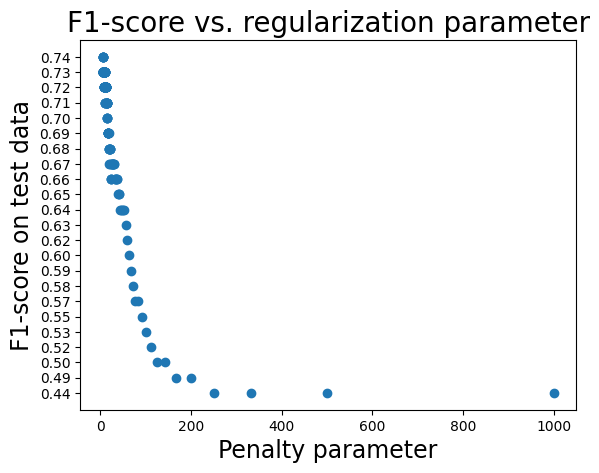

In [50]:
print("Starting")
for i in range(1,nsimu):
    logmodel[i] =(LogisticRegression(C=i/1000,solver="liblinear"))
    #logmodel[i] =(LogisticRegression(C=i/nsimu,solver="liblinear"))
    logmodel[i].fit(X_train,y_train)
    predictions[i] = logmodel[i].predict(X_test)
    class_report[i] = classification_report(y_test,predictions[i])
    l=class_report[i].split()
    f1[i] = l[len(l)-2]
    penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()